<a href="https://colab.research.google.com/github/Rafli-Putra/Pemrograman_Python/blob/main/Tugas%20Presensi%2011.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [282]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [283]:
ls

'104_Rafli Putra Agripamungkas.pdf'
'(1) 1101194115 Registrasi _ Telkom University.pdf'
 20200911_182150.jpg
 20201002_152948.jpg
'CamScanner 11-13-2020 15.52.pdf'
'CamScanner 11-27-2020 15.46.pdf'
 Classroom/
 Daun_ajaib/
'Getting started.pdf'
'penurunan rumus.pdf'
'Rafli Putra Agripamungkas_1101194115_104.docx'
'Rafli Putra Agripamungkas_1101194115_104.pdf'
'rangkaian pengganti norton.pdf'
'Timeline Rekruitasi (2020).gdoc'
'Untitled folder'/
'WhatsApp Image 2020-10-02 at 3.56.08 PM.jpeg'


In [333]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [334]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("Daun_ajaib")
data = []
labels = []

[INFO] loading images...


In [335]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((128, 128))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [336]:
print(labels)

['GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06', 'GMB_06',

In [337]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
(trainX, testX, trainY, testY) = train_test_split(np.array(data), np.array(labels), test_size=0.25, shuffle=True)

In [338]:
print(labels)

[[0 0 0 0 1]
 [0 0 0 0 1]
 [0 0 0 0 1]
 ...
 [1 0 0 0 0]
 [1 0 0 0 0]
 [1 0 0 0 0]]


In [488]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.3, shuffle=True)
print(trainX.shape)
print(testX.shape)


(408, 128, 128, 3)
(175, 128, 128, 3)


In [500]:
model = Sequential()
model.add(Convolution2D(64, 3, 3, activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Convolution2D(256, 3, 3, activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

In [460]:
#from keras.models import Sequential
#rom keras.layers.core import Flatten
#from keras.layers.core import Dense

#model = Sequential(
    #[
        #Flatten(input_shape=(128*128*3,)),
        #Dense(64, activation="relu", name="layer1"),
        #Dense(32, activation="relu", name="layer2"),
        #Dense(16, activation="relu", name="layer3"),
        #Dense(3, activation = "softmax", name="layer4"),
    #]
#)#

In [501]:
model.summary()

Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_153 (Conv2D)          (None, 42, 42, 64)        1792      
_________________________________________________________________
max_pooling2d_98 (MaxPooling (None, 21, 21, 64)        0         
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 7, 7, 256)         147712    
_________________________________________________________________
max_pooling2d_99 (MaxPooling (None, 3, 3, 256)         0         
_________________________________________________________________
flatten_81 (Flatten)         (None, 2304)              0         
_________________________________________________________________
dense_186 (Dense)            (None, 128)               295040    
_________________________________________________________________
dense_187 (Dense)            (None, 64)             

In [503]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [504]:
print("[INFO] training network ...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=32)

[INFO] training network ...
Epoch 1/100
13/13 [==============================] - 1s 105ms/step - loss: 1.6245 - accuracy: 0.1887 - val_loss: 1.6002 - val_accuracy: 0.2114
Epoch 2/100
13/13 [==============================] - 1s 93ms/step - loss: 1.6018 - accuracy: 0.2426 - val_loss: 1.5905 - val_accuracy: 0.2743
Epoch 3/100
13/13 [==============================] - 1s 95ms/step - loss: 1.5678 - accuracy: 0.3137 - val_loss: 1.5106 - val_accuracy: 0.3086
Epoch 4/100
13/13 [==============================] - 1s 97ms/step - loss: 1.4469 - accuracy: 0.3603 - val_loss: 1.3693 - val_accuracy: 0.4571
Epoch 5/100
13/13 [==============================] - 1s 94ms/step - loss: 1.3370 - accuracy: 0.3775 - val_loss: 1.2848 - val_accuracy: 0.4629
Epoch 6/100
13/13 [==============================] - 1s 93ms/step - loss: 1.2498 - accuracy: 0.4583 - val_loss: 1.3710 - val_accuracy: 0.4057
Epoch 7/100
13/13 [==============================] - 1s 94ms/step - loss: 1.1949 - accuracy: 0.4608 - val_loss: 1.1836 

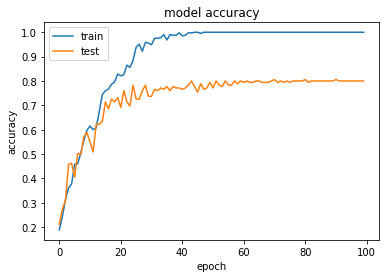

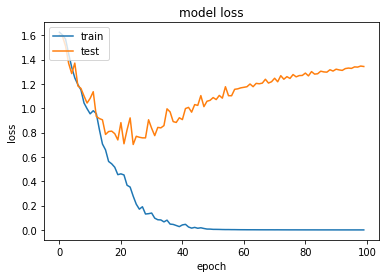

In [505]:
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [506]:
print("[INFO] evaluating network ...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network ...
              precision    recall  f1-score   support

      GMB_01       0.82      0.76      0.79        37
      GMB_02       0.84      0.81      0.82        26
      GMB_03       0.87      0.84      0.85        31
      GMB_05       0.88      0.82      0.85        44
      GMB_06       0.64      0.78      0.71        37

    accuracy                           0.80       175
   macro avg       0.81      0.80      0.80       175
weighted avg       0.81      0.80      0.80       175

